# Keyword Analysis for all Keywords

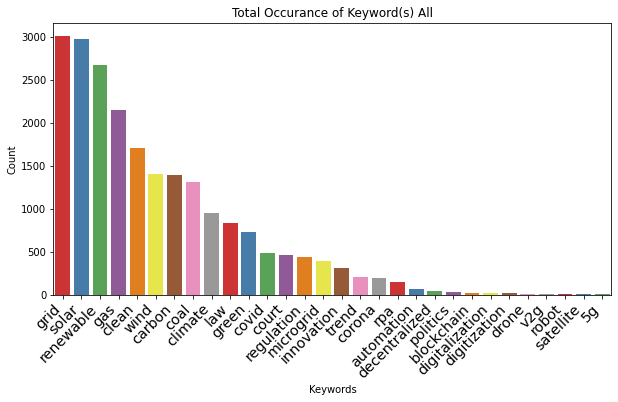

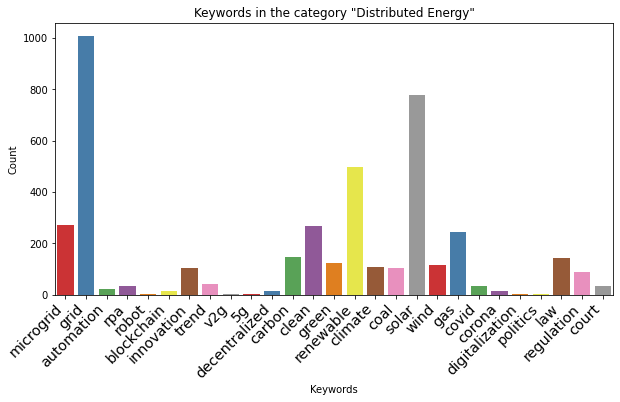

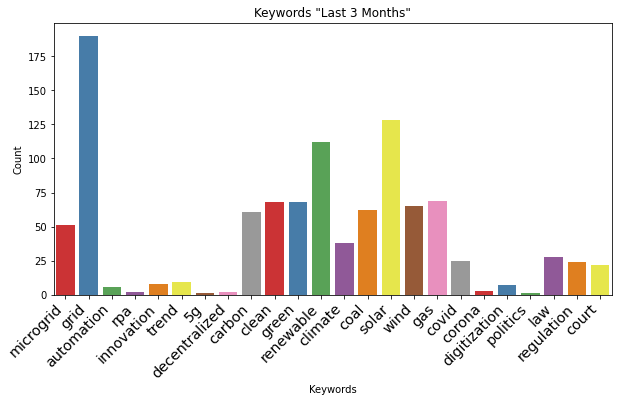

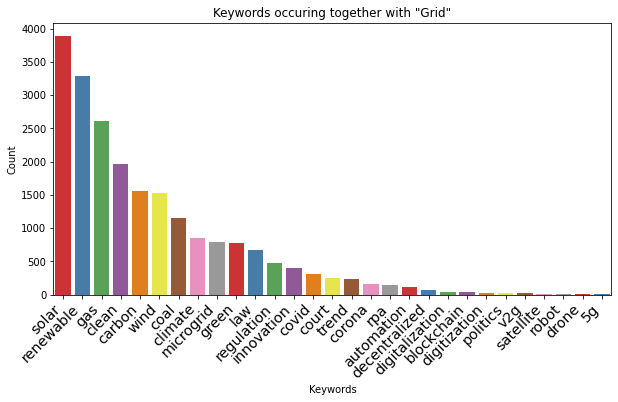

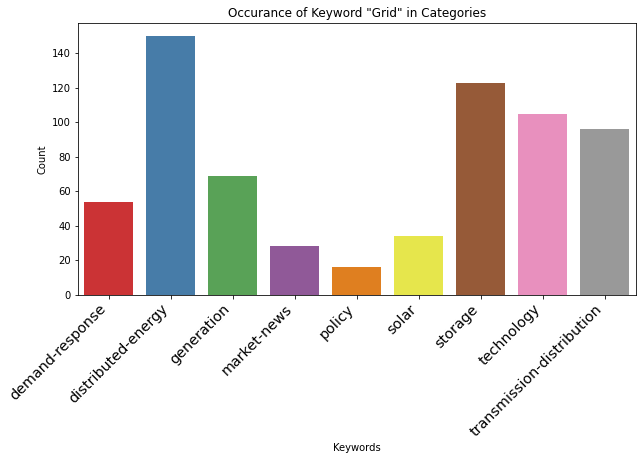

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import *
from ipynb.fs.full.SingleKeywords import keyword_plot, sum_columns, sort_keyword_frame, drop_empty_cols

In [2]:
double_keywords = pd.read_csv('../data/analysis/keywords_double_count.csv')
single_keywords = pd.read_csv('../data/analysis/keywords_single_count.csv')
double_total = pd.read_csv('../data/analysis/keywords_double_total.csv')
single_total = pd.read_csv('../data/analysis/keywords_single_total.csv')

In [3]:
single_total

Unnamed: 0                                              Title  microgrid  \
0           0  propelling the transition digitization bolster...      397.0   

     grid  automation    rpa  robot  blockchain  innovation  trend  ...  \
0  3009.0        63.0  152.0   10.0        23.0       308.0  203.0  ...   

     wind     gas  covid  corona  digitalization  digitization  politics  \
0  1401.0  2143.0  480.0   196.0            23.0          22.0      29.0   

     law  regulation  court  
0  829.0       433.0  456.0  

[1 rows x 32 columns]

In [4]:
double_total

Unnamed: 0  micro grid  smart grid  artificial intelligence  \
0           0      1862.0       143.0                     31.0   

   machine learning  distributed ledger  new technology  smart city  \
0              55.0                 2.0           418.0        81.0   

   predictive maintenance  vehicle to  high frequency  smart meter  iot data  \
0                    12.0       210.0            15.0        117.0       5.0   

   virtual reality  virtual assistant  clean energy  climate change  
0              1.0                1.0        1266.0           315.0

In [5]:
total = pd.DataFrame()
total = pd.concat([single_total, double_total], axis=1, sort=False)
total.drop(columns={'Unnamed: 0','Title'},inplace=True)

In [6]:
total

microgrid    grid  automation    rpa  robot  blockchain  innovation  trend  \
0      397.0  3009.0        63.0  152.0   10.0        23.0       308.0  203.0   

   drone  satellite  ...  smart city  predictive maintenance  vehicle to  \
0   11.0        9.0  ...        81.0                    12.0       210.0   

   high frequency  smart meter  iot data  virtual reality  virtual assistant  \
0            15.0        117.0       5.0              1.0                1.0   

   clean energy  climate change  
0        1266.0           315.0  

[1 rows x 46 columns]

<AxesSubplot:title={'center':'Keywords - All - Not Combined'}, xlabel='Keywords', ylabel='Count'>

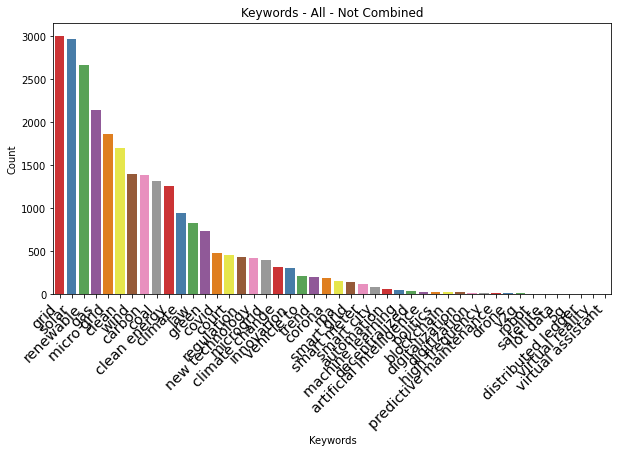

In [7]:
keyword_plot(total.T.sort_values(by=0, ascending=False).T,'Keywords - All - Not Combined')

## Combining similar Keywords

In [8]:
total['blockchain'] = total['blockchain'] + total['distributed ledger']
total.drop(columns={'distributed ledger'},inplace=True)
total['covid'] = total['covid'] + total['corona']
total.drop(columns={'corona'},inplace=True)
total['artificial intelligence'] = total['artificial intelligence'] + total['machine learning']
total.drop(columns={'machine learning'},inplace=True)
total['microgrid'] = total['microgrid'] + total['micro grid']
total.drop(columns={'micro grid'},inplace=True)

<AxesSubplot:title={'center':'Total Occurance of Keyword(s) All'}, xlabel='Keywords', ylabel='Count'>

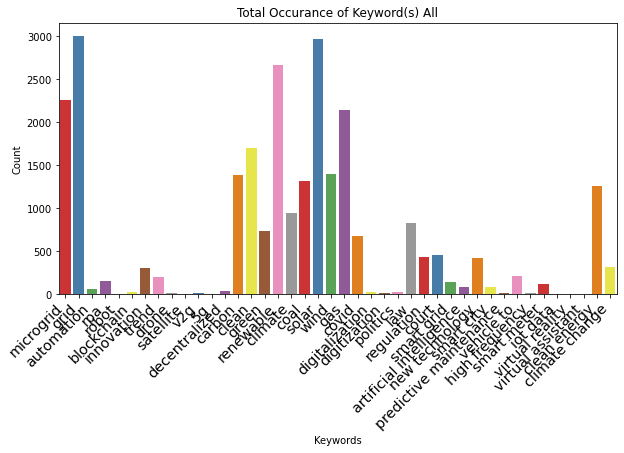

In [9]:
keyword_plot(total)

In [10]:
# Sort Keywords descending

In [11]:
desc = total.T.sort_values(by=0, ascending=False).T

In [12]:
desc

grid   solar  renewable  microgrid     gas   clean    wind  carbon  \
0  3009.0  2970.0     2665.0     2259.0  2143.0  1702.0  1401.0  1386.0   

     coal  clean energy  ...  high frequency  predictive maintenance   v2g  \
0  1313.0        1266.0  ...            15.0                    12.0  11.0   

   drone  robot  satellite  iot data   5g  virtual reality  virtual assistant  
0   11.0   10.0        9.0       5.0  4.0              1.0                1.0  

[1 rows x 42 columns]

In [13]:
from datetime import datetime
now = datetime.now()
#Save combined Keywords
#desc.to_csv('../data/analysis/keywords_all'+ now.strftime("%m_%d")+'.csv')
desc.to_csv('../data/analysis/keywords_all10_08.csv')

<AxesSubplot:title={'center':'Total Occurance of all Keywords - sorted'}, xlabel='Keywords', ylabel='Count'>

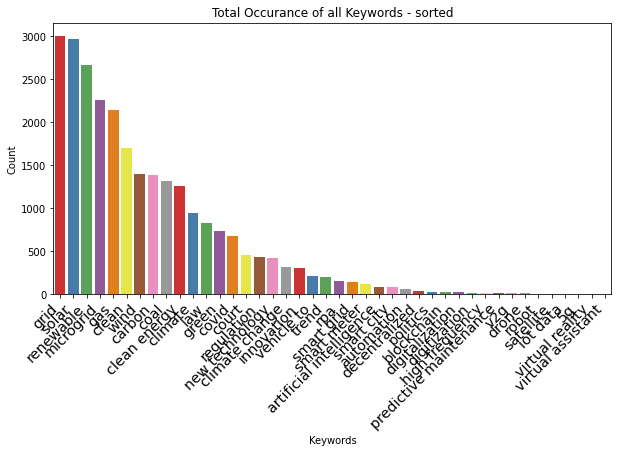

In [14]:
keyword_plot(desc,'Total Occurance of all Keywords - sorted')

In [15]:
desc.T[0] [desc.T[0] >20]

grid                       3009.0
solar                      2970.0
renewable                  2665.0
microgrid                  2259.0
gas                        2143.0
clean                      1702.0
wind                       1401.0
carbon                     1386.0
coal                       1313.0
clean energy               1266.0
climate                     947.0
law                         829.0
green                       733.0
covid                       676.0
court                       456.0
regulation                  433.0
new technology              418.0
climate change              315.0
innovation                  308.0
vehicle to                  210.0
trend                       203.0
rpa                         152.0
smart grid                  143.0
smart meter                 117.0
artificial intelligence      86.0
smart city                   81.0
automation                   63.0
decentralized                38.0
politics                     29.0
blockchain    

<AxesSubplot:title={'center':'Keywords > 100 and Sorted'}, xlabel='Keywords', ylabel='Count'>

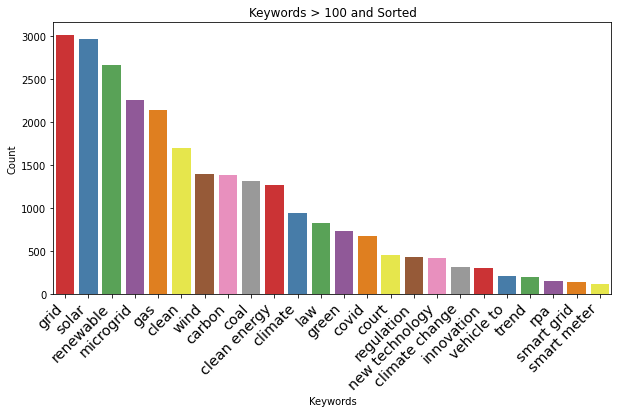

In [16]:
keyword_plot(desc.T[0][desc.T[0] > 100],'Keywords > 100 and Sorted')

<AxesSubplot:title={'center':'Keywords <100 and Sorted'}, xlabel='Keywords', ylabel='Count'>

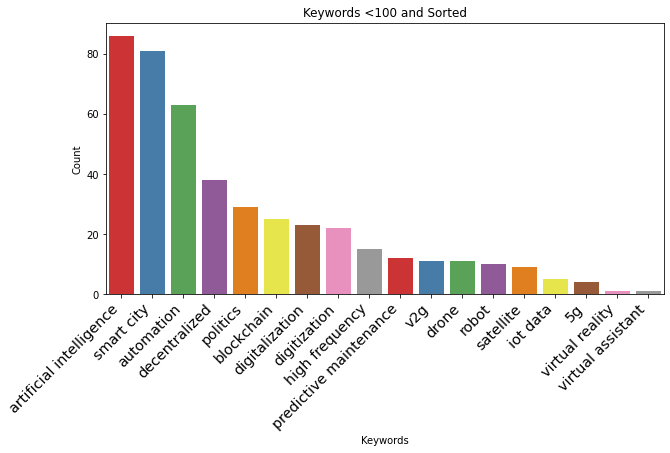

In [17]:
keyword_plot(desc.T[0][desc.T[0] < 100],'Keywords <100 and Sorted')

<AxesSubplot:title={'center':'All accumulated - Without "Grid"'}, xlabel='Keywords', ylabel='Count'>

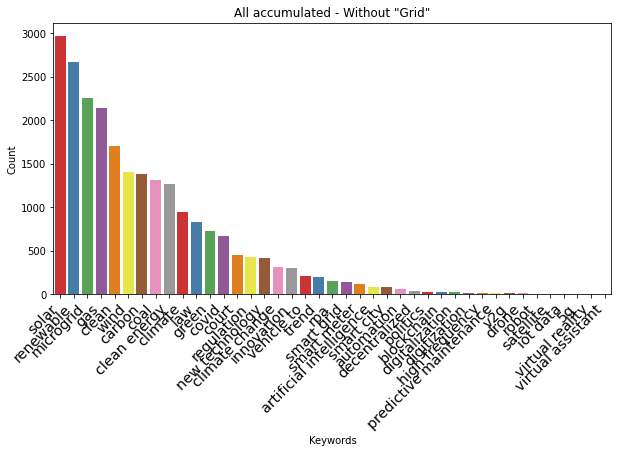

In [18]:
keyword_plot(sort_keyword_frame(total.drop(columns={'grid'})),'All accumulated - Without "Grid"')

In [19]:
# Sorted

In [20]:
comb_desc = total.T.sort_values(by=0, ascending=False).T

<AxesSubplot:title={'center':' Keywords > 100 and Sorted'}, xlabel='Keywords', ylabel='Count'>

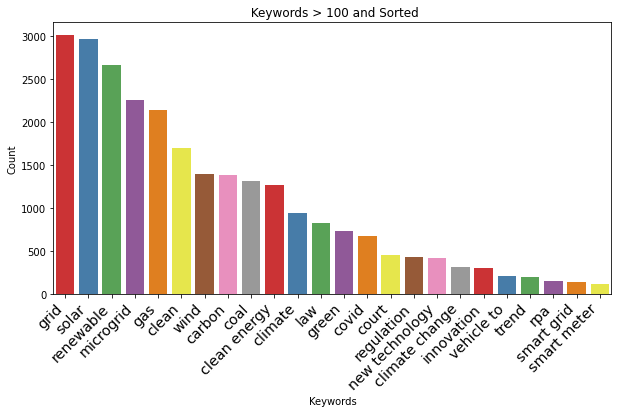

In [21]:
keyword_plot(comb_desc.T[0][comb_desc.T[0] > 100],' Keywords > 100 and Sorted')

# Analysing Keyword 'clean energy'

In [22]:
single_keywords.drop(columns={'Unnamed: 0'},inplace=True)
double_keywords.drop(columns={'Unnamed: 0','Title'},inplace=True)
all_keywords = pd.concat([single_keywords, double_keywords], axis=1, sort=False)

In [23]:
def sort_keyword_frame(df):
    return df.T.sort_values(by=0, ascending=False).T

In [24]:
all_keywords

FullTextLemma  \
0     ['increasing', 'digitization', 'power', 'secto...   
1     ['bipartisan', 'group', 'connecticut', 'lawmak...   
2     ['electric', 'transmission', 'line', '—', 'cap...   
3     ['following', 'contributed', 'article', 'emily...   
4     ['renewablesgenerated', 'electricity', 'batter...   
...                                                 ...   
1385  ['two', 'shift', 'transportation', 'sector', '...   
1386  ['electric', 'grid', 'becomes', 'distributed',...   
1387  ['n', 'pp1', 'margin', '00px', '00px', '00px',...   
1388  ['ev', 'deployment', 'one', 'pillar', 'durkan'...   
1389  ['following', 'contributed', 'article', 'brad'...   

                                                  Title  microgrid  grid  p2p  \
0     propelling the transition digitization bolster...          0    19    0   
1     following outrage over hurricane isaias respon...          0     2    0   
2     propelling the transition new and better trans...          0    15    0   
3     pipeline infrastructure planning in the era of...          0     0    0   
4     propelling the transition green hydrogen could...          2     3    0   
...                                                 ...        ...   ...  ...   
1385  how new ideas of mobility will shape public ev...          0     6    0   
1386  new york utilities propose cybersecurity proto...          0     2    0   
1387  how oncor is preparing for a wave of large ele...          0     2    0   
1388  seattle mayor proposes ev readiness requiremen...          0     0    0   
1389  energy transition carbon capture is clean ener...          0     2    0   

      matchmaking  automation  rpa  robot  blockchain  ...  high frequency  \
0               0           6    0      0           0  ...               0   
1               0           0    0      0           0  ...               0   
2               0           0    0      0           0  ...               0   
3               0           0    0      0           0  ...               0   
4               0           0    0      0           0  ...               0   
...           ...         ...  ...    ...         ...  ...             ...   
1385            0           0    0      0           0  ...               0   
1386            0           0    0      0           0  ...               0   
1387            0           0    0      0           0  ...               0   
1388            0           0    0      0           0  ...               0   
1389            0           0    0      0           0  ...               0   

      smart meter  edge analytics  iot data  augmented intelligence  \
0               0               0         0                       0   
1               0               0         0                       0   
2               0               0         0                       0   
3               0               0         0                       0   
4               0               0         0                       0   
...           ...             ...       ...                     ...   
1385            0               0         0                       0   
1386            0               0         0                       0   
1387            0               0         0                       0   
1388            0               0         0                       0   
1389            0               0         0                       0   

      augmented reality  virtual reality  virtual assistant  clean energy  \
0                     0                0                  0             0   
1                     0                0                  0             0   
2                     0                0                  0             3   
3                     0                0                  0             0   
4                     0                0                  0             1   
...                 ...              ...                ...           ...   
1385                  0        

In [25]:
all_keywords['blockchain'] = all_keywords['blockchain'] + all_keywords['distributed ledger']
all_keywords.drop(columns={'distributed ledger'},inplace=True)
all_keywords['covid'] = all_keywords['covid'] + all_keywords['corona']
all_keywords.drop(columns={'corona'},inplace=True)
all_keywords['artificial intelligence'] = all_keywords['artificial intelligence'] + all_keywords['machine learning']
all_keywords.drop(columns={'machine learning'},inplace=True)
all_keywords['microgrid'] = all_keywords['microgrid'] + all_keywords['micro grid']
all_keywords.drop(columns={'micro grid'},inplace=True)

In [26]:
# saving all_keywords to csv
now = datetime.now()
#all_keywords.to_csv('../data/analysis/texts_allkeywords'+ now.strftime("%m_%d")+'.csv')
all_keywords.to_csv('../data/analysis/texts_allkeywords10_08.csv')

In [27]:
cl_en = all_keywords[all_keywords['clean energy']>0]

In [28]:
en_df = pd.DataFrame()
for column in cl_en.columns: 
    try:
        en_df.at[0,column] = cl_en[column].sum()
    except BaseException:
        # Pass to avoid Exception thrown due to the 'Date' column not beeing the right format
        pass
for colum in en_df.columns:
    if en_df.at[0,colum] == 0:
        en_df = en_df.drop(columns={colum})

In [29]:
en_df.drop(columns={'FullTextLemma','Title','clean energy'},inplace=True)

In [30]:
en_df = sort_keyword_frame(en_df)

In [31]:
en_df

solar  renewable   clean    grid     gas  microgrid  carbon   wind   coal  \
0  1787.0     1680.0  1563.0  1329.0  1173.0     1090.0   900.0  834.0  765.0   

   climate  ...  automation  v2g  high frequency  blockchain  digitization  \
0    583.0  ...        14.0  6.0             5.0         5.0           4.0   

   predictive maintenance  satellite  digitalization  drone  virtual reality  
0                     2.0        2.0             1.0    1.0              1.0  

[1 rows x 37 columns]

In [32]:
#en_df.drop(columns={'microgrid','micro grid','smart grid'},inplace=True)
#en_df['blockchain'] = en_df['blockchain'] + en_df['distributed ledger']
#en_df.drop(columns={'distributed ledger'},inplace=True)
#en_df['covid'] = en_df['covid'] + en_df['corona']
#en_df.drop(columns={'corona'},inplace=True)
#en_df['artificial intelligence'] = en_df['artificial intelligence'] + en_df['machine learning']
#en_df.drop(columns={'machine learning'},inplace=True)
#en_df['regulation'] = en_df['regulation'] + en_df['law'] + en_df['court']
#en_df.drop(columns={'law','court'},inplace=True)

<AxesSubplot:title={'center':'Keywords that occur with "clean energy"'}, xlabel='Keywords', ylabel='Count'>

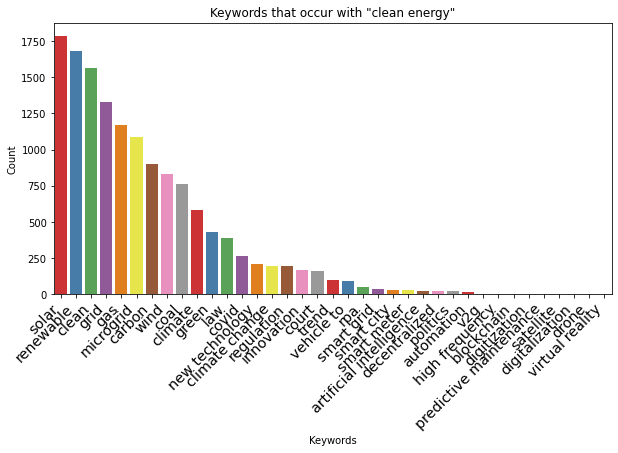

In [33]:
keyword_plot(en_df.T.sort_values(by=0, ascending=False).T,'Keywords that occur with "clean energy"')

In [34]:
en_df

solar  renewable   clean    grid     gas  microgrid  carbon   wind   coal  \
0  1787.0     1680.0  1563.0  1329.0  1173.0     1090.0   900.0  834.0  765.0   

   climate  ...  automation  v2g  high frequency  blockchain  digitization  \
0    583.0  ...        14.0  6.0             5.0         5.0           4.0   

   predictive maintenance  satellite  digitalization  drone  virtual reality  
0                     2.0        2.0             1.0    1.0              1.0  

[1 rows x 37 columns]

In [35]:
for col in en_df.columns:
    if en_df.at[0,col]<10:
        en_df.drop(columns={col}, inplace=True)

<AxesSubplot:title={'center':'Total Occurance of Keyword(s) All'}, xlabel='Keywords', ylabel='Count'>

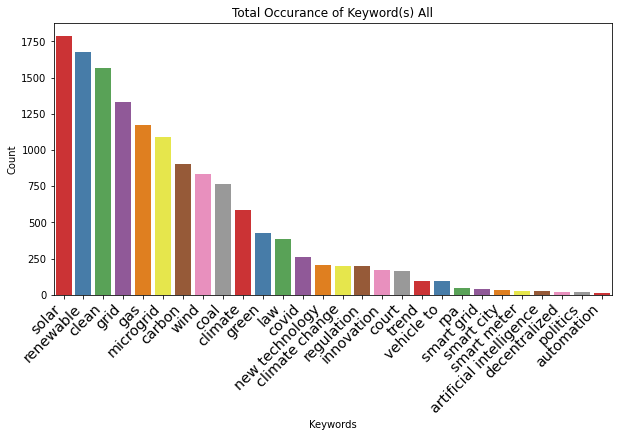

In [36]:
keyword_plot(en_df)

## Filtering Date

In [37]:
dates = pd.read_csv('../data/preprocessed/08_25PreProUDText.csv',sep=',', usecols=['Date','Title'], squeeze=True)

In [38]:
dates

Title         Date
0     propelling the transition digitization bolster...  Aug 21 2020
1     following outrage over hurricane isaias respon...  Aug 20 2020
2     propelling the transition new and better trans...  Aug 19 2020
3     pipeline infrastructure planning in the era of...  Aug 18 2020
4     propelling the transition green hydrogen could...  Aug 17 2020
...                                                 ...          ...
1388  how new ideas of mobility will shape public ev...  Feb 27 2019
1389  new york utilities propose cybersecurity proto...  Feb 27 2019
1390  how oncor is preparing for a wave of large ele...  Feb 25 2019
1391  seattle mayor proposes ev readiness requiremen...  Feb 21 2019
1392  energy transition carbon capture is clean ener...  Feb 14 2019

[1393 rows x 2 columns]

In [39]:
dates['Date']=pd.to_datetime(dates['Date'],format='%b %d %Y')

In [40]:
all_keywords = all_keywords.merge(dates, how='left', on='Title')

In [41]:
all_keywords.head()

FullTextLemma  \
0  ['increasing', 'digitization', 'power', 'secto...   
1  ['bipartisan', 'group', 'connecticut', 'lawmak...   
2  ['electric', 'transmission', 'line', '—', 'cap...   
3  ['following', 'contributed', 'article', 'emily...   
4  ['renewablesgenerated', 'electricity', 'batter...   

                                               Title  microgrid  grid  p2p  \
0  propelling the transition digitization bolster...         15    19    0   
1  following outrage over hurricane isaias respon...          2     2    0   
2  propelling the transition new and better trans...         19    15    0   
3  pipeline infrastructure planning in the era of...          0     0    0   
4  propelling the transition green hydrogen could...          2     3    0   

   matchmaking  automation  rpa  robot  blockchain  ...  smart meter  \
0            0           6    0      0           0  ...            0   
1            0           0    0      0           0  ...            0   
2            0           0    0      0           0  ...            0   
3            0           0    0      0           0  ...            0   
4            0           0    0      0           0  ...            0   

   edge analytics  iot data  augmented intelligence  augmented reality  \
0               0         0                       0                  0   
1               0         0                       0                  0   
2               0         0                       0                  0   
3               0         0                       0                  0   
4               0         0                       0                  0   

   virtual reality  virtual assistant  clean energy  climate change       Date  
0                0                  0             0               0 2020-08-21  
1                0                  0             0               0 2020-08-20  
2                0                  0             3               0 2020-08-19  
3                0                  0             0               0 2020-08-18  
4                0                  0             1               0 2020-08-17  

[5 rows x 58 columns]

In [42]:
now = all_keywords[all_keywords['Date'] >= (datetime.now() - relativedelta(months=+3))]

In [43]:
now = sum_columns(now.drop(columns={'Title','FullTextLemma','Date'}))

In [44]:
now = drop_empty_cols(now)

In [45]:
keyword_plot(now.T.sort_values(by=0, ascending=False).T,'Keywords in last 3 Months')

<AxesSubplot:title={'center':'Keywords in last 3 Months'}, xlabel='Keywords', ylabel='Count'>

## Analyzing the appearance of a single keyword over time

In [46]:
keywords_6mon = all_keywords[all_keywords['Date'] >= (datetime.now() - relativedelta(months=+6))]

In [47]:
# Summing covid per month

In [48]:
import datetime
months_choices=[]
for i in range(1,13):
    months_choices.append((i, datetime.date(2020, i, 1).strftime('%B')))

In [49]:
for i in range(0,12):
    print(months_choices[i][1])

January
February
March
April
May
June
July
August
September
October
November
December


In [50]:
covid = pd.DataFrame(columns={months_choices[i][1] for i in range (0,12)})

In [51]:
covid.loc[0] = 0

In [52]:
keywords_6mon['Date'].loc[0].strftime('%B')

'August'

In [53]:
for row in keywords_6mon.index:
    month = keywords_6mon.at[row,'Date'].strftime('%B')
    covid.at[0,month] = covid.at[0,month] +1

In [54]:
covid

February July May September November August April December March October  \
0        0   62  70         0        0     45     0        0     0       0   

  June January  
0   80       0

In [55]:
for i in range (0,12):
    old = months_choices[i][1]
    new = months_choices[i][0]
    covid=covid.rename(columns={old: new})

In [56]:
covid = covid.T.sort_index()

In [57]:
for row in covid.index:
    covid.at[row,'Month']= row

In [58]:
covid = covid.rename(columns={0:'Count'})

In [59]:
dict(months_choices)

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [60]:
covid

Count  Month
1      0    1.0
2      0    2.0
3      0    3.0
4      0    4.0
5     70    5.0
6     80    6.0
7     62    7.0
8     45    8.0
9      0    9.0
10     0   10.0
11     0   11.0
12     0   12.0

In [61]:
covid = covid.T.drop(columns={9,10,11,12}).T

In [62]:
sns.set_palette(sns.color_palette("BuGn_r"))
dayplot = sns.barplot(x="Month", y="Count", palette="Set1",data=covid)
#dayplot.set(xlim=(30,575),ylim=(0,9),xticks=[0,100,200,300,400,500])
plt.setp(dayplot.get_xticklabels(), rotation=45)
plt.title("Keyword Covid per month since Jan")
#plt.figure(figsize=(10, 5))

Text(0.5, 1.0, 'Keyword Covid per month since Jan')

In [63]:
covid_line=keywords_6mon.groupby('Date').sum()

In [64]:
for idx in covid_line.index:
    covid_line.at[idx,'Date']= idx

<Figure size 720x360 with 0 Axes>

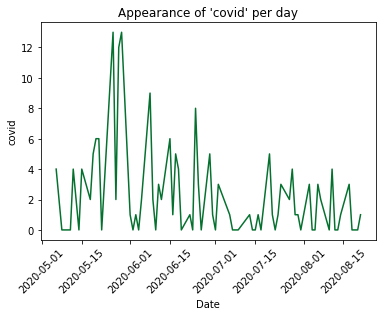

<Figure size 720x360 with 0 Axes>

In [65]:
sns.set_palette(sns.color_palette("BuGn_r"))
dayplot = sns.lineplot(x="Date", y="covid", palette="Set1",data=covid_line)
#dayplot.set(xlim=(30,575),ylim=(0,9),xticks=[0,100,200,300,400,500])
plt.setp(dayplot.get_xticklabels(), rotation=45)
plt.title("Appearance of 'covid' per day")
plt.figure(figsize=(10, 5))

In [66]:
covid_line['MovingAv7'] = covid_line['covid'].rolling(7).mean()

<Figure size 720x360 with 0 Axes>

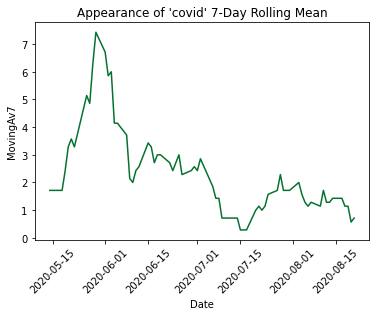

<Figure size 720x360 with 0 Axes>

In [67]:
sns.set_palette(sns.color_palette("BuGn_r"))
dayplot = sns.lineplot(x="Date", y="MovingAv7", palette="Set1",data=covid_line)
#dayplot.set(xlim=(30,575),ylim=(0,9),xticks=[0,100,200,300,400,500])
plt.setp(dayplot.get_xticklabels(), rotation=45)
plt.title("Appearance of 'covid' 7-Day Rolling Mean")
plt.figure(figsize=(10, 5))

## Identify articles of a certain keyword

In [68]:
all_keywords

FullTextLemma  \
0     ['increasing', 'digitization', 'power', 'secto...   
1     ['bipartisan', 'group', 'connecticut', 'lawmak...   
2     ['electric', 'transmission', 'line', '—', 'cap...   
3     ['following', 'contributed', 'article', 'emily...   
4     ['renewablesgenerated', 'electricity', 'batter...   
...                                                 ...   
1385  ['two', 'shift', 'transportation', 'sector', '...   
1386  ['electric', 'grid', 'becomes', 'distributed',...   
1387  ['n', 'pp1', 'margin', '00px', '00px', '00px',...   
1388  ['ev', 'deployment', 'one', 'pillar', 'durkan'...   
1389  ['following', 'contributed', 'article', 'brad'...   

                                                  Title  microgrid  grid  p2p  \
0     propelling the transition digitization bolster...         15    19    0   
1     following outrage over hurricane isaias respon...          2     2    0   
2     propelling the transition new and better trans...         19    15    0   
3     pipeline infrastructure planning in the era of...          0     0    0   
4     propelling the transition green hydrogen could...          2     3    0   
...                                                 ...        ...   ...  ...   
1385  how new ideas of mobility will shape public ev...          5     6    0   
1386  new york utilities propose cybersecurity proto...          2     2    0   
1387  how oncor is preparing for a wave of large ele...          0     2    0   
1388  seattle mayor proposes ev readiness requiremen...          0     0    0   
1389  energy transition carbon capture is clean ener...          0     2    0   

      matchmaking  automation  rpa  robot  blockchain  ...  smart meter  \
0               0           6    0      0           0  ...            0   
1               0           0    0      0           0  ...            0   
2               0           0    0      0           0  ...            0   
3               0           0    0      0           0  ...            0   
4               0           0    0      0           0  ...            0   
...           ...         ...  ...    ...         ...  ...          ...   
1385            0           0    0      0           0  ...            0   
1386            0           0    0      0           0  ...            0   
1387            0           0    0      0           0  ...            0   
1388            0           0    0      0           0  ...            0   
1389            0           0    0      0           0  ...            0   

      edge analytics  iot data  augmented intelligence  augmented reality  \
0                  0         0                       0                  0   
1                  0         0                       0                  0   
2                  0         0                       0                  0   
3                  0         0                       0                  0   
4                  0         0                       0                  0   
...              ...       ...                     ...                ...   
1385               0         0                       0                  0   
1386               0         0                       0                  0   
1387               0         0                       0                  0   
1388               0         0                       0                  0   
1389               0         0                       0                  0   

      virtual reality  virtual assistant  clean energy  climate change  \
0                   0                  0             0               0   
1                   0                  0             0               0   
2                   0                  0             3               0   
3                   0                  0             0               0   
4                   0                  0             1               0   
...               ...                ...           ...             ...   
1385            

In [69]:
urls = pd.read_csv('../data/preprocessed/08_25PreProUDText.csv',sep=',', usecols=['URL','Title'], squeeze=True)

In [70]:
all_keywords = all_keywords.merge(urls, how='left', on='Title')

In [71]:
def find_articles(keyword):
    key_df = all_keywords[all_keywords[keyword]>0]
   
    key_df = key_df[['Title','URL','Date',keyword]]

    key_df.sort_values(by=keyword, ascending=False, inplace=True)
    
    return key_df

In [72]:
find_articles('artificial intelligence')

Title  \
710   from ev integration to wildfire prevention uti...   
631   how does ai improve grid performance no one fu...   
634   in the cat and mouse game of utility cyberatta...   
1336  artificial intelligence and machine learning m...   
0     propelling the transition digitization bolster...   
426   utilities say they are prepared to meet cyber ...   
1219            scaling cybersecurity in the age of iot   
1363  xs and os how utilities can leverage data chan...   
1326  rejecting the new normal california eyes techn...   
1171  ders and derms platforms take center stage in ...   
1102  breaking through the hype – neural networks an...   
929   smarter investment and maintenance strategies ...   
706   satisfying utility customers is getting much h...   
423   beyond alexa banking healthcare offer examples...   
27    propelling the transition the battle for contr...   
319   slowed payoff from billions in ami investment ...   
217   engie enel x tesla top guidehouse rankings of ...   
131   hitachi completes acquisition of abb power gri...   
138   fluence unveils intelligent modular storage pr...   
1229  tendril to acquire energysavvy as utility cust...   
1226  averting disasters with innovation utilities p...   
210   covid19 pushes energy storage leader out of ma...   
1106  utilities are the new cyber battlefield as us ...   
385   google machine learning shifts data center ope...   
303   texas regulators tamp down authority of propos...   
1017          vw and ford expand partnership on evs avs   
318   utilities vs grid edge upstarts turf battles i...   
779   as utilities scramble to manage explosive der ...   
718   hanging with the lab rats nrel researchers lay...   
21    illinois regulators reject proposal to allow u...   
1381            the expanding api economy for utilities   

                                                    URL       Date  \
710   https://www.utilitydive.com/news/from-ev-integ... 2019-11-13   
631   https://www.utilitydive.com/news/how-does-ai-i... 2019-11-14   
634   https://www.utilitydive.com/news/artificial-in... 2019-11-07   
1336  https://www.utilitydive.com/spons/artificial-i... 2019-04-23   
0     https://www.utilitydive.com/news/propelling-th... 2020-08-21   
426   https://www.utilitydive.com/news/utilities-say... 2020-02-14   
1219  https://www.utilitydive.com/spons/scaling-cybe... 2019-05-23   
1363  https://www.utilitydive.com/news/xs-and-os-how... 2019-08-19   
1326  https://www.utilitydive.com/news/rejecting-the... 2019-05-02   
1171  https://www.utilitydive.com/spons/ders-and-der...        NaT   
1102  https://www.utilitydive.com/news/breaking-thro... 2019-06-28   
929   https://www.utilitydive.com/spons/smarter-inve...        NaT   
706   https://www.utilitydive.com/news/customer-enga... 2019-11-15   
423   https://www.utilitydive.com/news/beyond-alexa-... 2020-03-06   
27    https://www.utilitydive.com/news/propelling-th... 2020-08-18   
319   https://www.utilitydive.com/news/slowed-pay-of... 2020-02-20   
217   https://www.utilitydive.com/news/engie-enel-x-... 2020-05-29   
131   https://www.utilitydive.com/news/hitachi-compl... 2020-07-02   
138                                                 NaN        NaT   
1229  https://www.utilitydive.com/news/tendril-to-ac... 2019-05-07   
1226  https://www.utilitydive.com/news/averting-disa... 2019-05-10   
210                                                 NaN        NaT   
1106  https://www.utilitydive.com/news/utilities-are... 2019-06-18   
385   https://www.utilitydive.com/news/google-machin... 2020-05-04   
303   https://www.utilitydive.com/news/texas-regulat... 2020-05-19   
1017  https://www.utilitydive.com/news/vw-and-ford-e... 2019-07-15   
318   https://www.utilitydive.com/news/utilities-vs-... 2020-02-21   
779   https://www.utilitydive.com/news/as-utilities-... 2019-09-11   
718   https://www.utilitydive.com/news/hanging-with-... 2019-10-22   
21    https://www.utilitydive.com/news/illinois-regu... 2020-